In [46]:
import re
import  string
import nltk
import numpy as np

from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Load doc into memory
def load_doc(filename):
    with open(filename, 'r') as file:
        text = file.read()
    return text

# Testing the function
text = load_doc('./data/review_polarity-20231215T050834Z-001/review_polarity/review_polarity/txt_sentoken/neg/cv000_29416.txt')
text

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [49]:
# turn a doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens


clean = clean_doc(text)
clean

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'whats',
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 'didnt',
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 'whats',
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',

In [50]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # Load the doc
    doc = load_doc(filename)
    # Clean the doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return " ".join(tokens)


with open('./data/vocab.txt') as file:
    vocab = file.read().split()

print(doc_to_line('./data/review_polarity-20231215T050834Z-001/review_polarity/review_polarity/txt_sentoken/neg/cv000_29416.txt',  vocab=vocab))

plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually f

In [51]:
def process_train(directory, vocab):
    documents = list()
    for filename in listdir(directory):
        if not filename.startswith('cv9'):
            path = directory + '/' + filename
            doc = load_doc(path)
            tokens = clean_doc(doc, vocab)
            documents.append(tokens)
    return documents


def process_test(directory, vocab):
    documents = list()
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            path = directory + '/' + filename
            doc = load_doc(path)
            tokens = clean_doc(doc, vocab)
            documents.append(tokens)
    return documents

In [52]:
# Load all docs in directory
def process_docs(directory, vocab, is_train):
    documents = list()
    for filename in listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        doc = load_doc(path)
        tokens = clean_doc(doc)
        documents.append(tokens)
    return documents

In [53]:
lines = process_docs(directory='./data/review_polarity-20231215T050834Z-001/review_polarity/txt_sentoken/pos',
                     vocab=vocab,
                     is_train=True)
len(lines)

900

In [54]:
# Load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # Load documents
    neg = process_docs(directory='./data/review_polarity-20231215T050834Z-001/review_polarity/txt_sentoken/neg',
                       vocab=vocab,
                       is_train=is_train)
    pos = process_docs(directory='./data/review_polarity-20231215T050834Z-001/review_polarity/txt_sentoken/pos',
                       vocab=vocab,
                       is_train=is_train)
    docs = pos + neg

    # Prepare Labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels


train, train_labels = load_clean_dataset(vocab=vocab, is_train=True)
test, test_labels = load_clean_dataset(vocab=vocab, is_train=False)

In [55]:
len(train), len(train_labels)

(1810, 1810)

In [56]:
len(test), len(test_labels)

(200, 200)

## Build the Model

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [58]:
# Define the model
def define_model(n_words):
    keras.backend.clear_session()
    # Define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Summzarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [59]:
define_model(n_words=len(vocab))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1288400   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1288451 (4.92 MB)
Trainable params: 1288451 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# Create the tokenizer
tokenizer = create_tokenizer(train)

In [61]:
# Encode data
X_train = tokenizer.texts_to_matrix(train, mode='binary')
X_train.shape

(1810, 44277)

In [62]:
# define network
n_words = X_train.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2213900   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2213951 (8.45 MB)
Trainable params: 2213951 (8.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.fit(X_train, np.array(train_labels), epochs=10, batch_size=10)

Epoch 1/10
181/181 [==============================] - 3s 14ms/step - loss: 0.4529 - accuracy: 0.7724
Epoch 2/10
181/181 [==============================] - 3s 14ms/step - loss: 0.0308 - accuracy: 0.9978
Epoch 3/10
181/181 [==============================] - 3s 14ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 4/10
181/181 [==============================] - 3s 14ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/10
181/181 [==============================] - 3s 14ms/step - loss: 7.5873e-04 - accuracy: 1.0000
Epoch 6/10
181/181 [==============================] - 3s 14ms/step - loss: 4.1330e-04 - accuracy: 1.0000
Epoch 7/10
181/181 [==============================] - 3s 14ms/step - loss: 2.5930e-04 - accuracy: 1.0000
Epoch 8/10
181/181 [==============================] - 3s 14ms/step - loss: 1.7849e-04 - accuracy: 1.0000
Epoch 9/10
181/181 [==============================] - 3s 14ms/step - loss: 1.3067e-04 - accuracy: 1.0000
Epoch 10/10
181/181 [==============================] - 3s 14ms/step - l

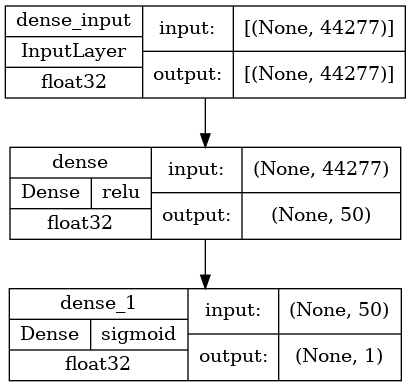

In [64]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_shapes=True, show_layer_names=True)

## Inferencing on Test Data

In [65]:
X_test = tokenizer.texts_to_matrix(test, mode='binary')

score = model.evaluate(X_test, np.array(test_labels), batch_size=1, verbose=1)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

200/200 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9050
Test Loss: 0.2551477551460266
Test Accuracy: 0.9049999713897705


## Predictions on New Data

In [66]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie.'

In [67]:
def predict_sentiment(review):
    tokens = clean_doc(review)
    line = ' '.join(tokens)
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    yhat = model.predict(encoded, verbose=0)
    percent_pos = yhat[0, 0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [68]:
text1_review = predict_sentiment(text1)
text1_review

(0.6859170496463776, 'NEGATIVE')

In [69]:
text2_review = predict_sentiment(text2)
text2_review

(0.6624303, 'POSITIVE')

In [70]:
text = [text1, text2]
text = tokenizer.texts_to_matrix(text)
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
pred = model.predict(text)
pred = np.argmax(pred, axis=1)
pred

1/1 [==============================] - 0s 23ms/step


array([0, 0])